<a href="https://colab.research.google.com/github/alanfpv95/Data-Science/blob/main/Solucion_Reto_SC_63_AlanPi%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.


In [66]:
import pandas as pd #Para leer la información
import numpy as np
from sklearn.model_selection import train_test_split # Para hacer la partición de los datos en punto 8
import matplotlib.pyplot as plt # Para hacer histograma
from sklearn.linear_model import LogisticRegression # Para hacer regresión logística
from sklearn.preprocessing import LabelEncoder #Para transformación de datos categóricos
from sklearn.preprocessing import OneHotEncoder #Para transformación de datos categóricos
from sklearn.metrics import confusion_matrix # Para obtener matriz de confusión
from sklearn.neural_network import MLPRegressor #Para red neuronal
from sklearn.datasets import make_regression #Para red neuronal

5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [67]:
data_bank = pd.read_csv('/content/drive/MyDrive/Data Science/Aprendizaje Supervisado/bank_marketing_RETO_DS_AS.csv')

display(data_bank.head())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt


  https://firebasestorage.googleapis.com/v0/b/tlg-prod.appspot.com/o/assets%2Ffile%2F0.fqbqx5y9y1c0.8hw801u28arbank-names-RETO_DS_AS.txt?alt=media&token=eef7a864-be7e-4ab3-b0af-0f01f48100df

6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [68]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [69]:
#from sklearn.preprocessing import LabelEncoder

# El labelencoder introduce relaciones ordinales artificales, por lo que solo
# se usará en las variables categóticas binarias. Así evitamos crear columnas
# de más y usamos onehotencoder para las variables sin orden inherente.


#data = pd.read_csv('/content/drive/MyDrive/Data Science/Aprendizaje Supervisado/bank_marketing_RETO_DS_AS.csv')

nominal_cols = ['job', 'marital', 'contact', 'month', 'poutcome','education']
binary_cols = ['default', 'housing', 'loan', 'y']

# Aplicar onehotencoder usango pd.get_dummies para las variables nominales
data_bank = pd.get_dummies(data_bank, columns=nominal_cols, drop_first=True)
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(data_bank[nominal_cols]).toarray())
# data_bank = data_bank.join(enc_df)
# data_bank.drop(nominal_cols, axis=1, inplace=True)


# Aplicar labelenconder para las variables binarias
for col in binary_cols:
    le = LabelEncoder()
    data_bank[col] = le.fit_transform(data_bank[col])

display(data_bank.head())

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,31,0,2666,0,0,10,318,2,97,6,...,False,True,False,False,False,True,False,False,True,False
1,29,0,1584,0,0,6,245,1,-1,0,...,False,False,False,True,False,False,True,False,False,True
2,41,0,2152,1,0,17,369,1,-1,0,...,False,True,False,False,False,False,True,True,False,False
3,50,0,84,1,0,17,18,8,-1,0,...,False,False,False,False,False,False,True,True,False,False
4,40,0,0,0,0,28,496,2,182,11,...,False,False,False,False,False,True,False,True,False,False


In [70]:
print(data_bank.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')


7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [71]:
# Identificar columnas numéricas para crear gráficas y verificar si tienen sesgo
columnas_numericas = data_bank.select_dtypes(include=np.number).columns
columnas_numericas

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

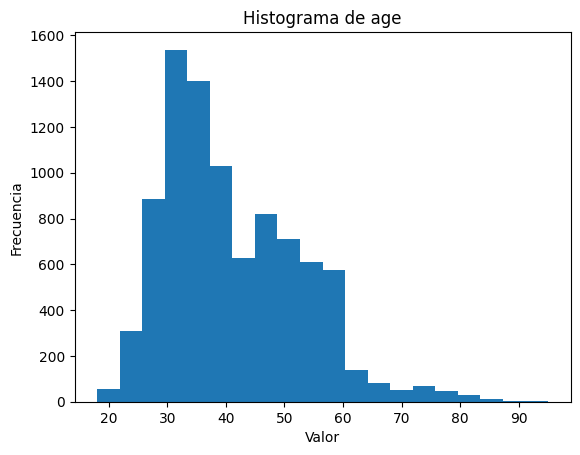

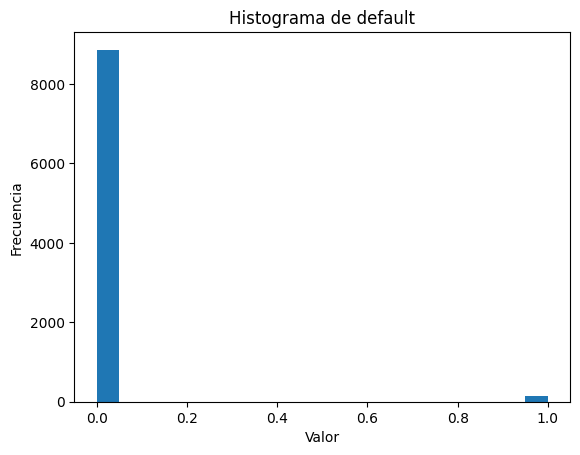

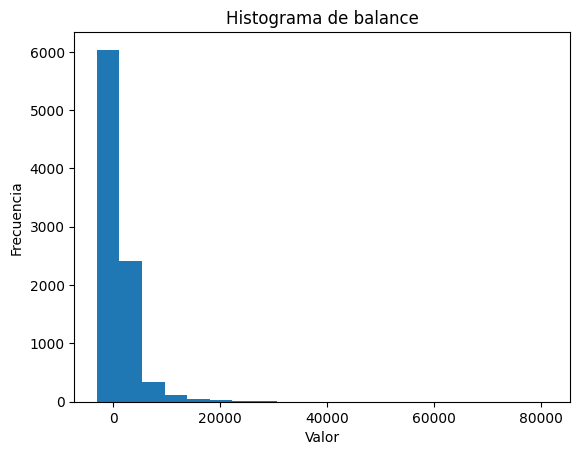

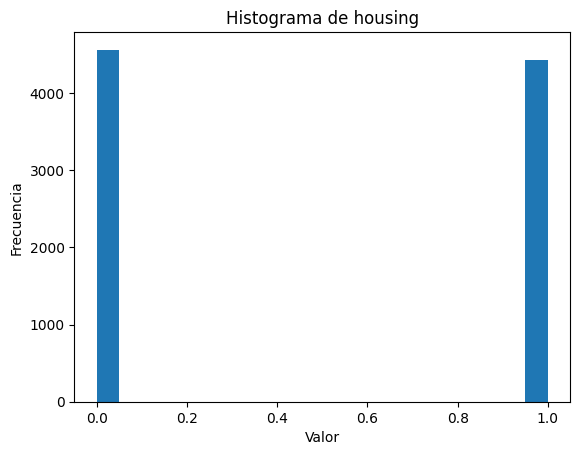

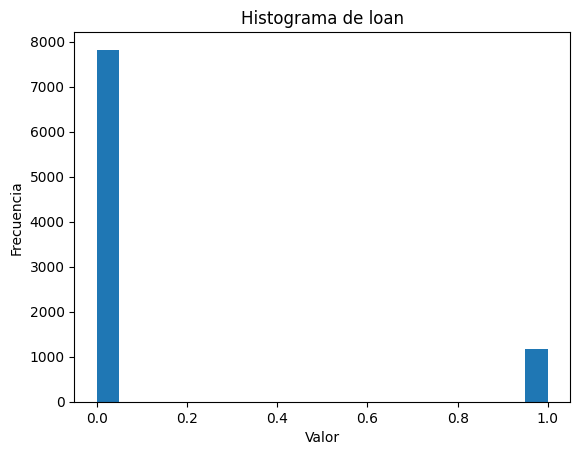

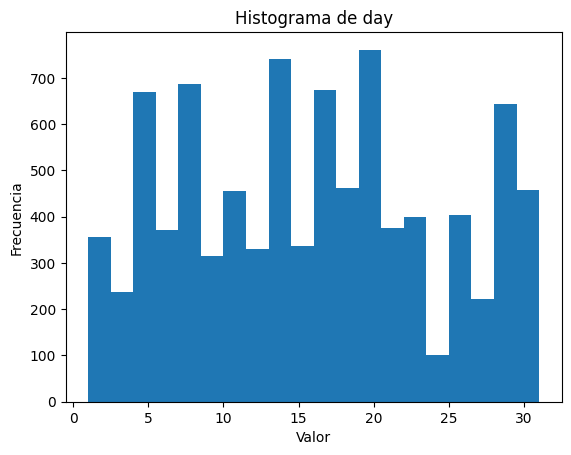

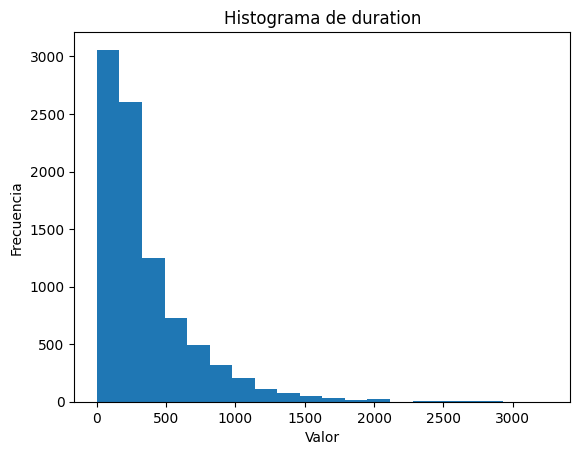

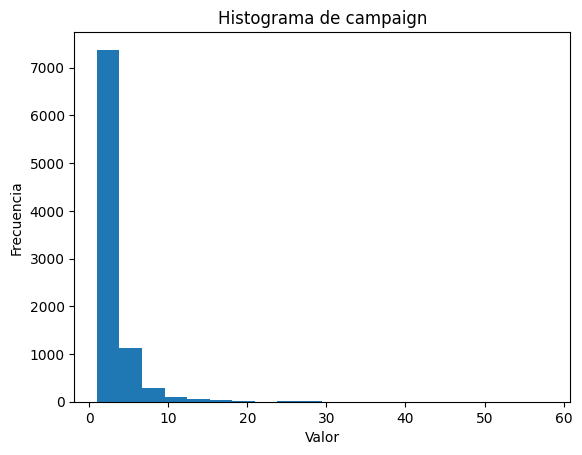

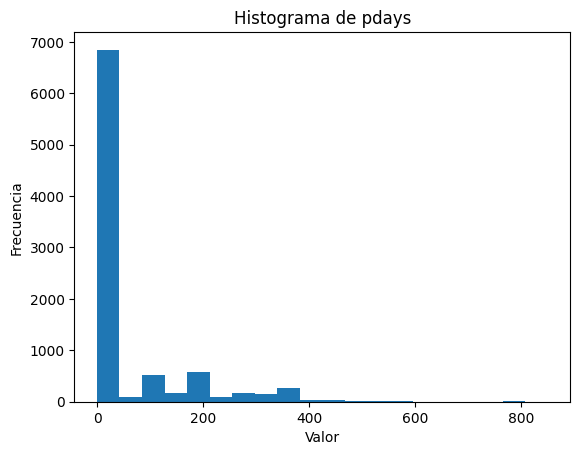

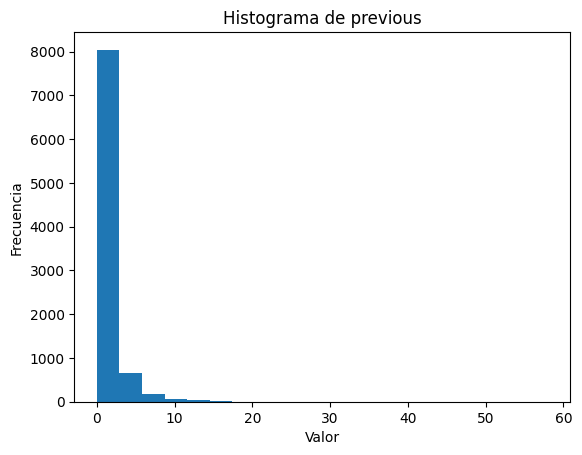

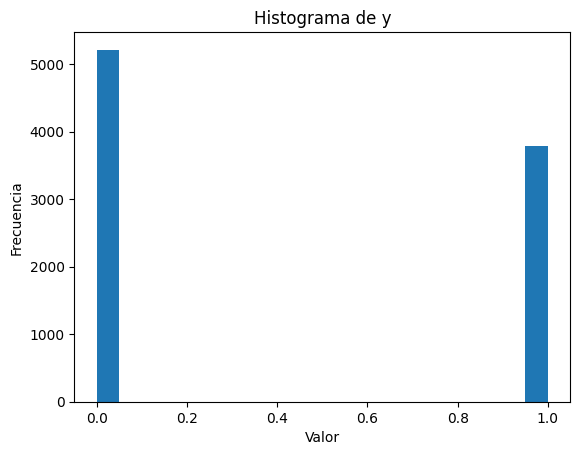

In [72]:
#Crear y desplegar histograma para cada variable numérica para identificar sesgo

for columna in columnas_numericas:
    plt.hist(data_bank[columna], bins=20)
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

Viendo las gráficas, podemos observar que todas tienen un sesgo positivo a excepción de day. Procederemos a hacer la transformación para el resto de las variables

In [73]:
def fun1(x):
  #Sumamos dos porque la columna pdays tiene valores de -1, lo que da error en la transformación logarítica
  return np.log(x + 2)

for columna in columnas_numericas:
  if columna != 'day' and columna != 'balance' and columna != 'y':
    #Evitamos hacer la transformación también en balance ya que en este caso sí tiene sentido que tenga valores negativos
    data_bank[columna] = data_bank[columna].apply(fun1)

8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.


In [74]:
X = data_bank.drop('y', axis=1)
Y = data_bank['y']

X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,3.496508,0.693147,2666,0.693147,0.693147,10,5.768321,1.386294,4.595120,2.079442,...,False,True,False,False,False,True,False,False,True,False
1,3.433987,0.693147,1584,0.693147,0.693147,6,5.509388,1.098612,0.000000,0.693147,...,False,False,False,True,False,False,True,False,False,True
2,3.761200,0.693147,2152,1.098612,0.693147,17,5.916202,1.098612,0.000000,0.693147,...,False,True,False,False,False,False,True,True,False,False
3,3.951244,0.693147,84,1.098612,0.693147,17,2.995732,2.302585,0.000000,0.693147,...,False,False,False,False,False,False,True,True,False,False
4,3.737670,0.693147,0,0.693147,0.693147,28,6.210600,1.386294,5.214936,2.564949,...,False,False,False,False,False,True,False,True,False,False


9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [75]:
# Importante correr célula de códig para importar librerías

x_train_validation, x_test, y_train_validation, y_test = \
train_test_split(X, Y, test_size=.20)

# Con 7200 datos restantes, para obtener el 20% del total de datos sería
# 1800/7200 = 0.25
x_train, x_validation, y_train, y_validation = \
train_test_split(x_train_validation, y_train_validation, test_size=.25)

In [76]:
print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimensión X_validation_set:\t", x_validation.shape)
print("Dimension X_test_set:\t\t", x_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 42)
Dimensión X_validation_set:	 (1800, 42)
Dimension X_test_set:		 (1800, 42)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


10.	Aplica el modelo **Regresión Logística** en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [77]:
clf = LogisticRegression( C=2.0, solver='newton-cg' )
modelo_RL = clf.fit( x_train, y_train )

In [78]:
print("Regresión Logística:\nExactitud (accuracy) con el conjunto de Validación = ",
       modelo_RL.score(x_validation, y_validation))

Regresión Logística:
Exactitud (accuracy) con el conjunto de Validación =  0.8305555555555556


In [79]:
#Obtener matriz de confusión

pr = modelo_RL.predict(x_test)
confusion_matrix(y_test, pr)

array([[931, 138],
       [171, 560]])

11.	Aplica el modelo **Red Neuronal** en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [80]:


X, Y = make_regression(n_samples=1000, n_features=5, n_targets=1, noise=10.0)
print(X.shape)
print(Y.shape)

(1000, 5)
(1000,)


In [81]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.60)

In [82]:


modelo_NNR = MLPRegressor(hidden_layer_sizes=(15,8), max_iter=5000)
modelo_NNR.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(15, 8), max_iter=5000)

In [83]:
pred = modelo_NNR.predict(x_test)

12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

El modelo de regresión logística da una exactitud de 0.818 por lo que es el mejor resultado disponible.

13.	Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

Usando el modelo podemos hacer predicciones de aproximadamente el 80% de precisión para tomar decisiones. Para decidir en qué invertir los recursos, como de publicidad y marketing para lograr mejores ventas y que ayuden a mejorar el negocio. También puede aplicar para otros campos, no solo de negocio. Podríamos usar la misma lógica para ver si un paquete puede llegar a tiempo o si un camión de pasajeros llega a tiempo a su destino, habría que tomar información real y ver cómo se comporta en el mundo real para poder hacer predicciones sobre lo que funciona o no y con base en eso, dedicar recursos para aplicar mejoras.

14.	Descarga tu script (archivo con extensión .ipynb) y guárdalo siguiendo la nomenclatura que se te indica en Formato de entrega de actividad.  
15.	Sube el archivo a GitHub.  
16.	Copia y pega en un archivo de edición de texto la liga de tu archivo.
